<a href="https://colab.research.google.com/github/JANG-hyeonjun/biomedical_deeplearning/blob/main/lab02_201602955_%EC%9E%A5%ED%98%84%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2linear-regression-scratch

## 3.2.1generating the Dataset

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x557ad1090000 @  0x7f25d3014615 0x557a97ea606c 0x557a97f85eba 0x557a97ea8e8d 0x557a97f9a99d 0x557a97f1cfe9 0x557a97f17b0e 0x557a97eaa77a 0x557a97f1ce50 0x557a97f17b0e 0x557a97eaa77a 0x557a97f1986a 0x557a97f9b7c6 0x557a97f18ee2 0x557a97f9b7c6 0x557a97f18ee2 0x557a97f9b7c6 0x557a97f18ee2 0x557a97f9b7c6 0x557a97f18ee2 0x557a97eaa69a 0x557a97f18c9e 0x557a97f17e0d 0x557a97eaa77a 0x557a97f18a45 0x557a97eaa69a 0x557a97f18a45 0x557a97f17b0e 0x557a97eaa77a 0x557a97f1986a 0x557a97f17b0e
     |████████████████████████████████| 846.0MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 81kB 3.7MB/s 


In [10]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

In [27]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    print(w.shape)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(len(y))
    y += torch.normal(0,0.01,y.shape)
    print('\n')
    print(len(y))
    return X,y.reshape((-1,1))


In [28]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

torch.Size([2])
torch.Size([1000, 2])
1000


1000


In [38]:
print(features.shape)
print(labels.shape)
print(len(features))

torch.Size([1000, 2])
torch.Size([1000, 1])
1000


In [30]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.7414, -0.6390]) 
label: tensor([4.8895])


In [36]:
print(features[:,(1)])

tensor([-6.3902e-01, -1.1848e-01,  5.5934e-01,  6.2406e-01,  5.2831e-01,
        -1.5532e+00, -6.8597e-01,  1.7225e+00, -3.2548e-01, -9.5501e-01,
        -1.2491e+00, -2.6831e-01, -1.6468e+00, -1.2546e+00,  1.0300e+00,
         3.1259e-02,  9.6967e-01,  6.3420e-01, -5.1759e-01,  7.1628e-01,
         1.0257e+00, -3.6773e-02, -2.1962e-01,  5.4717e-02,  4.6760e-01,
        -1.1086e+00,  8.9514e-02,  3.5880e-02,  1.0312e+00, -7.5418e-01,
         8.0898e-01,  1.5351e+00, -1.8470e+00, -8.9598e-01,  7.4582e-01,
         1.4874e+00,  1.4657e+00,  9.0993e-02, -1.2590e+00, -2.7861e-01,
         4.1870e-01, -8.5416e-02, -9.5456e-02, -1.6825e+00, -7.4067e-01,
        -1.8295e-01,  1.8444e+00,  6.8708e-01, -5.8806e-01,  1.1425e+00,
        -3.7453e-01,  1.8040e-01, -1.9841e+00,  1.1549e+00,  3.7575e-01,
        -2.2673e+00,  1.4531e+00,  1.1719e+00,  1.5433e+00, -2.4854e+00,
        -1.4779e+00, -6.9243e-01,  1.0120e-01, -1.0666e+00, -1.2656e+00,
        -9.7498e-01,  1.0035e+00, -1.2270e+00,  1.4

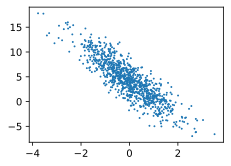

In [37]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

## 3.2 Reading the Dataset

In [97]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)
    #print(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        #print(len(batch_indices))
        yield features[batch_indices],labels[batch_indices]

In [98]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break

tensor([[ 1.9148,  1.0035],
        [ 0.5211,  0.3929],
        [-1.3575,  1.5677],
        [ 1.7978, -1.2355],
        [-0.6448,  0.6655],
        [-1.1736,  1.2421],
        [-0.1943, -0.6587],
        [-0.5062,  2.7496],
        [ 0.3059, -1.9841],
        [ 1.2247, -2.4572]]) 
 tensor([[ 4.6285],
        [ 3.9106],
        [-3.8369],
        [11.9872],
        [ 0.6454],
        [-2.3832],
        [ 6.0467],
        [-6.1487],
        [11.5540],
        [15.0105]])


## 3.2.3 initializing Model Parameters

In [76]:
w = torch.normal(0,0.01,size=(2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [77]:
print(w,b)

tensor([[-0.0078],
        [-0.0029]], requires_grad=True) tensor([0.], requires_grad=True)


## 3.2.4 Defining the Model

In [78]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([10, 2])
torch.Size([2, 1])
torch.Size([10, 1])


In [79]:
def lineareg(X,w,b):
    return torch.matmul(X,w) + b

## 3.2.5 Defining the Loss Function

In [101]:
def squared_loss(y_hat,y):
    #print(y_hat.shape)
    #print(y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6 Defining the Optimization Algorithm

In [102]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.7 Training

In [103]:
lr = 0.03
num_epochs = 3
net = lineareg
loss = squared_loss

In [104]:
print(features.shape)

torch.Size([1000, 2])


In [105]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}') 


epoch1,loss0.000050
epoch2,loss0.000050
epoch3,loss0.000050


In [108]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([0.0002, 0.0001], grad_fn=<SubBackward0>)
error in estimating b:tensor([-0.0006], grad_fn=<RsubBackward1>)


#